In [1]:
from linares_plot import *
import sys, os
path_tools = 'C:\\Users\\David\\Documents\\GitHub\\encoding\\scripts\\wm_representation\\functions\\IEM\\tools'
sys.path.insert(1, path_tools)
from timecourse import *
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
path = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_trials.xlsx'
df=pd.read_excel(path)
df.head()

,Unnamed: 0,index,type,delay1,delay2,T,NT1,NT2,Dist,Dist_NT1,...,angle_16.345,angle_18.68,angle_21.015,angle_23.35,angle_25.685,angle_28.02,angle_30.355,angle_32.69,angle_35.025,brain_region
0,0,0,1,0.2,11.8,142,241,321,126.0,214.7,...,353.306880,301.334949,53.138939,146.178575,172.671739,334.001720,342.383377,335.097734,180.318258,visual
1,1,1,3,7.0,12.0,204,51,114,311.0,65.1,...,239.733096,254.710918,277.986737,15.277336,22.813718,26.142667,29.932089,195.239276,190.548065,visual
2,2,2,3,7.0,5.0,63,200,139,305.0,216.7,...,358.545119,340.488780,342.883275,330.619499,159.648407,157.173739,168.093078,163.740625,328.732464,visual
3,3,3,3,7.0,12.0,296,223,156,53.0,204.2,...,41.006448,233.746383,50.056368,22.161452,12.949112,338.683813,209.808055,201.980750,187.059487,visual
4,4,4,3,0.2,11.8,312,42,232,113.0,29.4,...,172.449342,133.071008,3.575792,311.213662,356.300365,6.816928,337.767719,187.996226,173.282839,visual


In [3]:
len(df)

7952

In [4]:
print(df.subject.unique())
print(df.brain_region.unique())
print(df.Condition.unique())

['d001' 'n001' 'b001' 'r001' 's001' 'l001']
['visual' 'ips' 'pfc' 'broca']
['1_0.2' '2_7' '1_7' '2_0.2']


In [32]:
df.columns


Index(['Unnamed: 0', 'index', 'type', 'delay1', 'delay2', 'T', 'NT1', 'NT2',
       'Dist', 'Dist_NT1', 'Dist_NT2', 'distance_T_dist', 'cue', 'order',
       'orient', 'horiz_vertical', 'A_R', 'A_err', 'Abs_angle_error',
       'Error_interference', 'A_DC', 'A_DC_dist', 'Q_DC', 'A_DF', 'A_DF_dist',
       'Q_DF', 'A_DVF', 'Q_DVF', 'A_DVF_dist', 'Q_DVF_dist',
       'presentation_att_cue_time', 'presentation_target_time',
       'presentation_dist_time', 'presentation_probe_time', 'R_T',
       'trial_time', 'disp_time', 'T_alone', 'dist_alone', 'T_close',
       'dist_close', 'subject', 'session', 'run', 'session_run', 'Condition',
       'signal_0.0', 'signal_2.335', 'signal_4.67', 'signal_7.005',
       'signal_9.34', 'signal_11.675', 'signal_14.01', 'signal_16.345',
       'signal_18.68', 'signal_21.015', 'signal_23.35', 'signal_25.685',
       'signal_28.02', 'signal_30.355', 'signal_32.69', 'signal_35.025',
       'angle_0.0', 'angle_2.335', 'angle_4.67', 'angle_7.005', 'angle_9.3

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interp

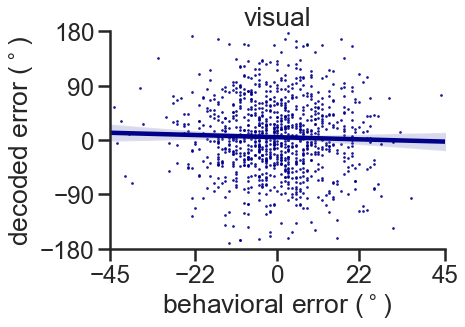

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              3837.0613         
Min. group size:  141     Likelihood:         -5521.6339        
Max. group size:  186     Converged:          Yes               
Mean group size:  166.0                                         
------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept      4.683      2.111    2.218   0.027    0.546    8.821
A_err         -0.162      0.162   -0.995   0.320   -0.480    0.157
Group Var      3.363      0.270                                   



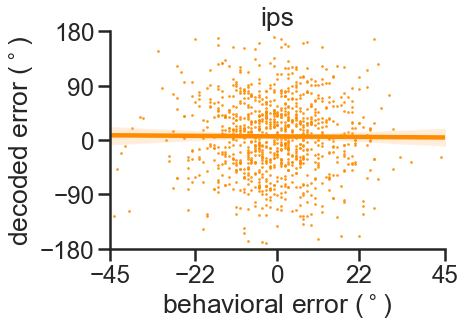

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              3892.4270         
Min. group size:  141     Likelihood:         -5541.1807        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
-----------------------------------------------------------------
                Coef.    Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         5.940    25.548   0.233  0.816  -44.133  56.013
A_err            -0.011     0.166  -0.067  0.947   -0.337   0.314
Group Var      3892.427                                          



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


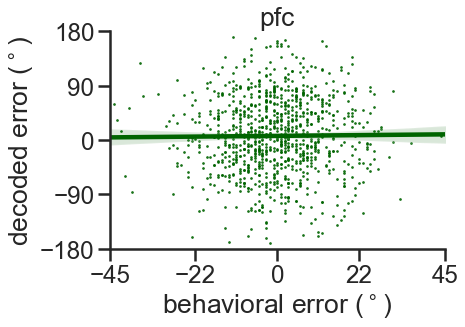

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              4065.0421         
Min. group size:  141     Likelihood:         -5551.5908        
Max. group size:  186     Converged:          Yes               
Mean group size:  166.0                                         
------------------------------------------------------------------
               Coef.    Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       6.801      2.799   2.430   0.015    1.315   12.288
A_err           0.072      0.168   0.426   0.670   -0.259    0.402
Group Var      22.342      0.482                                  



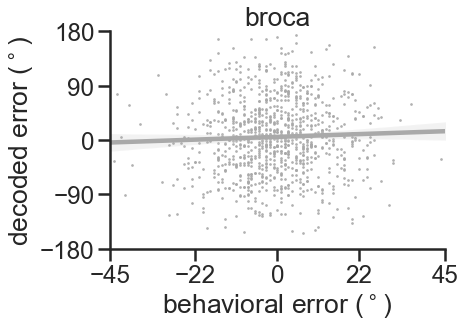

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_delay_err
No. Observations: 996     Method:             REML              
No. Groups:       6       Scale:              3997.0048         
Min. group size:  141     Likelihood:         -5541.5956        
Max. group size:  186     Converged:          No                
Mean group size:  166.0                                         
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       5.163      2.013   2.564   0.010    1.217    9.109
A_err           0.208      0.170   1.221   0.222   -0.126    0.541
Group Var       0.015      0.247                                  



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)


In [41]:
colors_ = ['darkblue', 'darkorange', 'darkgreen', 'darkgrey']

for idxr, rEG in enumerate(['visual', 'ips', 'pfc', 'broca']):
    plt.figure()
    #df_1_02 = df.loc[(df['Condition']=='1_0.2') & (df['T_alone'] == df['T']) & (df['brain_region'] ==rEG)]
    df_= df.loc[(df['T_alone'] == df['T']) & (df['brain_region'] ==rEG) & (df['Abs_angle_error'] <45)]
    df_['decoding_delay'] = df_[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
    df_['decoding_delay_err'] = 180 - df_['decoding_delay']
    sns.regplot(df_['A_err'], df_['decoding_delay_err'], marker="o", color=colors_[idxr], scatter_kws={'s':3} )
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.title(rEG)
    plt.xlim(-45, 45)
    plt.xticks([-45,-22,0,22,45])
    plt.ylim(-180, 180)
    plt.yticks([-180,-90,0,90,180])
    #slope, intercept, r_value, p_value, std_err = stats.linregress(df_['A_err'], df_['decoding_delay_err'])
    #plt.text(20, 60, "y= {0:.3f}x + {1:.3f}".format(slope,intercept), color='k', fontsize=15)
    #plt.text(20, 30, "p one sided={0:.3f}".format(p_value/2), color='k', fontsize=15)
    plt.xlabel('behavioral error ($^\circ$)')
    plt.ylabel('decoded error ($^\circ$)')
    plt.show() 
    ###
    ###
    res_m = smf.mixedlm(formula='decoding_delay_err ~ A_err', data=df_, groups=df_['subject']).fit()
    print(res_m.summary())
    

In [13]:
df.columns

Index(['Unnamed: 0', 'index', 'type', 'delay1', 'delay2', 'T', 'NT1', 'NT2',
       'Dist', 'Dist_NT1', 'Dist_NT2', 'distance_T_dist', 'cue', 'order',
       'orient', 'horiz_vertical', 'A_R', 'A_err', 'Abs_angle_error',
       'Error_interference', 'A_DC', 'A_DC_dist', 'Q_DC', 'A_DF', 'A_DF_dist',
       'Q_DF', 'A_DVF', 'Q_DVF', 'A_DVF_dist', 'Q_DVF_dist',
       'presentation_att_cue_time', 'presentation_target_time',
       'presentation_dist_time', 'presentation_probe_time', 'R_T',
       'trial_time', 'disp_time', 'T_alone', 'dist_alone', 'T_close',
       'dist_close', 'subject', 'session', 'run', 'session_run', 'Condition',
       'signal_0.0', 'signal_2.335', 'signal_4.67', 'signal_7.005',
       'signal_9.34', 'signal_11.675', 'signal_14.01', 'signal_16.345',
       'signal_18.68', 'signal_21.015', 'signal_23.35', 'signal_25.685',
       'signal_28.02', 'signal_30.355', 'signal_32.69', 'signal_35.025',
       'angle_0.0', 'angle_2.335', 'angle_4.67', 'angle_7.005', 'angle_9.3

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'')

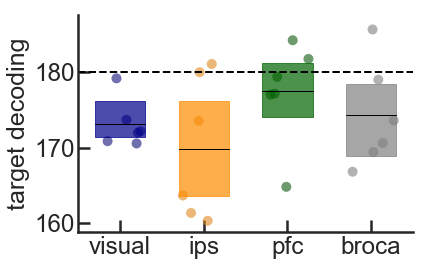

In [6]:
df_1_02 = df.loc[(df['Condition']=='1_0.2')]
df_1_02['decoding_delay'] = df_1_02[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [180,180], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5,1,'')

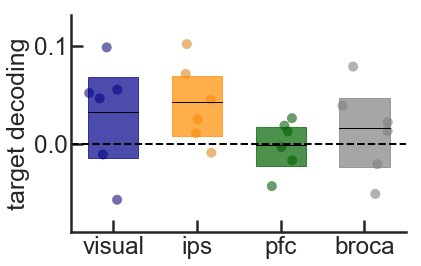

In [17]:
df_1_02 = df.loc[(df['Condition']=='1_0.2')]
df_1_02['decoding_delay'] = df_1_02[['signal_11.675', 'signal_14.01', 'signal_16.345', 'signal_18.68']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'')

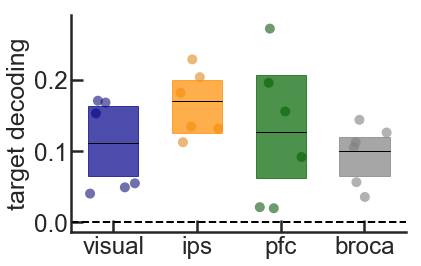

In [18]:
df_1_7 = df.loc[(df['Condition']=='1_7')]
df_1_7['decoding_delay'] = df_1_7[['signal_11.675', 'signal_14.01']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'')

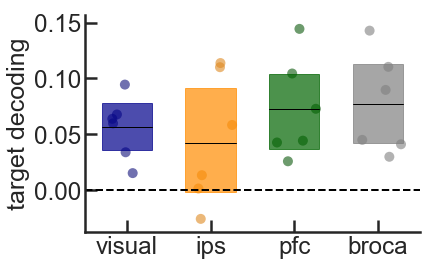

In [24]:
df_2_7 = df.loc[(df['Condition']=='2_7')]
df_2_7['decoding_delay'] = df_2_7[['signal_11.675', 'signal_14.01']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')